In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
df = pd.read_csv("Ex1-Class-train.csv")

In [8]:
df

,x1,x2,x3,x4,x5,y
0,-17.20,30.38,7.48,26.15,21.32,B
1,5.23,-11.30,-4.49,-8.77,-6.76,A
2,2.31,6.24,9.27,13.17,-3.58,B
3,1.24,6.91,8.41,14.41,-2.43,B
4,10.53,-23.79,-9.82,-23.38,-12.86,A
...,...,...,...,...,...,...
185,24.23,-34.07,-4.41,15.78,-37.05,B
186,5.88,-25.08,-18.39,-14.31,-9.34,A
187,0.53,1.10,2.35,-5.73,0.57,A
188,13.01,-36.62,-21.88,-1.76,-21.85,A


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   y       190 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.0+ KB


In [10]:
x = df[["x1", "x2", "x3", "x4", "x5"]]
y = df["y"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #แบ่งเทสเซ็ตกับเทรนนิ่งเซ็ตเป็น 30:70

In [12]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
print(tree.export_text(model))

|--- feature_4 <= -2.74
|   |--- feature_3 <= 5.15
|   |   |--- class: A
|   |--- feature_3 >  5.15
|   |   |--- feature_2 <= -6.96
|   |   |   |--- class: A
|   |   |--- feature_2 >  -6.96
|   |   |   |--- feature_3 <= 7.14
|   |   |   |   |--- feature_0 <= 9.68
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_0 >  9.68
|   |   |   |   |   |--- class: A
|   |   |   |--- feature_3 >  7.14
|   |   |   |   |--- feature_2 <= 14.45
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_2 >  14.45
|   |   |   |   |   |--- feature_3 <= 12.20
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- feature_3 >  12.20
|   |   |   |   |   |   |--- class: A
|--- feature_4 >  -2.74
|   |--- feature_3 <= -0.47
|   |   |--- feature_1 <= 26.16
|   |   |   |--- feature_4 <= -1.17
|   |   |   |   |--- class: B
|   |   |   |--- feature_4 >  -1.17
|   |   |   |   |--- feature_4 <= 1.18
|   |   |   |   |   |--- feature_1 <= -4.79
|   |   |   |   |   |   |--- class: C
|   |   |

In [14]:
y_pred = model.predict(x_test)

In [15]:
y_pred

array(['C', 'A', 'B', 'C', 'C', 'A', 'A', 'A', 'B', 'C', 'A', 'B', 'A',
       'C', 'B', 'A', 'A', 'C', 'C', 'A', 'A', 'C', 'B', 'B', 'C', 'C',
       'B', 'A', 'B', 'B', 'C', 'B', 'A', 'C', 'B', 'B', 'A', 'C', 'A',
       'A', 'A', 'A', 'B', 'B', 'C', 'C', 'A', 'C', 'A', 'A', 'A', 'B',
       'A', 'B', 'B', 'B', 'C'], dtype=object)

In [16]:
acc = accuracy_score(y_test, y_pred)

In [17]:
acc

0.8421052631578947

In [18]:
prf = precision_recall_fscore_support(y_test, y_pred, average = "weighted")
prf

(0.8518518518518519, 0.8421052631578947, 0.8452585712647632, None)

In [19]:
"""
output = ["Precision", "Recall", "F1"]
n = 0
for i in prf:
    print(f"{output[n]}: {prf[n]}")
    n += 1
"""

'\noutput = ["Precision", "Recall", "F1"]\nn = 0\nfor i in prf:\n    print(f"{output[n]}: {prf[n]}")\n    n += 1\n'

In [20]:
confusion_matrix(y_test, y_pred)

array([[18,  4,  0],
       [ 3, 13,  0],
       [ 1,  1, 17]], dtype=int64)

In [ ]:
%matplotlib widget
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["A", "B", "C"])
cm_display.plot()
plt.show()

In [22]:
cm = confusion_matrix(y_test, y_pred)
out = ['A', 'B', 'C']
conf_matrix_df = pd.DataFrame(cm, columns=out, index=out)

Text(86.25, 0.5, 'Actual')

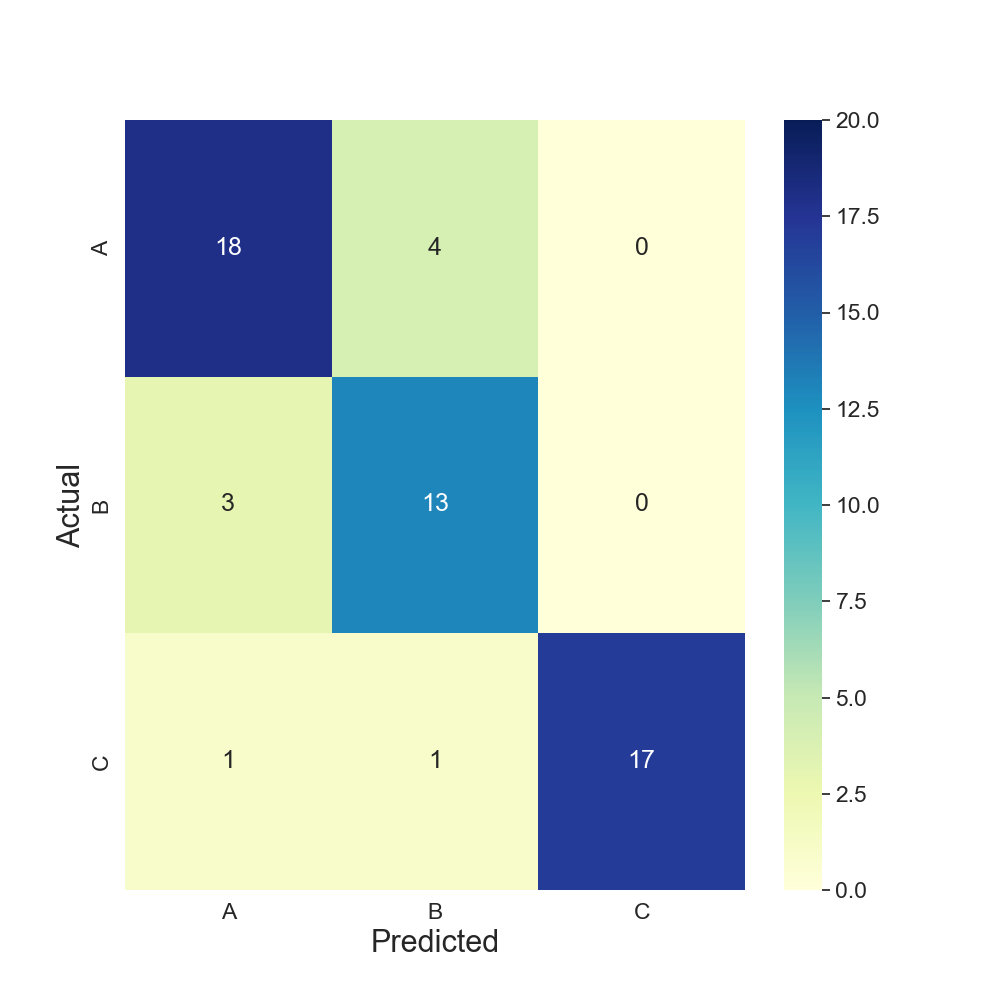

In [35]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='YlGnBu',
            annot=True,  #แสดงเลข
            fmt='.5g',  #เกี่ยวกับการแสดงผลตัวเลข
            vmin=0,
            vmax=20)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [24]:
from sklearn.model_selection import KFold

In [25]:
kf = KFold(n_splits=4) #แบ่งข้อมูลเป็น 4 ชุด 3ชุดเทรน 1ชุดเทส แล้วก็วนใหม่อีกรอบให้แจ่ละรอบมีชุดเทส ชุดเทรนไม่เหมือนกัน เพื่อให้โมเดลมีความครอบคลุม

In [26]:
acc_list = []

for train_index, test_index in kf.split(x):
  X_train, X_test = x.loc[train_index], x.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

print("------------------------------------")
print("Decision Tree")
print(" Mean Accuracy :", np.mean(acc_list))

------------------------------------
Decision Tree
 Mean Accuracy : 0.8003102836879432


In [27]:
df_unseen = pd.read_csv("Ex1-Class-unseen.csv")

In [28]:
x = df[["x1", "x2", "x3", "x4", "x5"]]
y = df["y"]

In [29]:
x_unseen = df_unseen[["x1", "x2", "x3", "x4", "x5"]]

In [30]:
my_model = DecisionTreeClassifier()
my_model.fit(x, y)

DecisionTreeClassifier()

In [31]:
y_unseen = my_model.predict(x_unseen)

In [32]:
n = 0
for i in y_unseen:
    print(f"{n + 1}. {y_unseen[n]}")
    n += 1

1. A
2. B
3. A
4. C
5. A
6. A
7. C
8. B
9. C
10. B
